**Image classification in cifar-10 dataset**

# Description of the data set cifar-10

Import Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

Load the Datasetusing tensorflow


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Explore the Dataset

In [ ]:
print("Training data shape:", x_train.shape)  # (50000, 32, 32, 3)
print("Training labels shape:", y_train.shape)  # (50000, 1)

print("Testing data shape:", x_test.shape)  # (10000, 32, 32, 3)
print("Testing labels shape:", y_test.shape)  # (10000, 1)

num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)  # 10

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)
Number of classes: 10


the classes in cifar-10 dataset

In [ ]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

print("Classes in CIFAR-10 dataset:")
for class_id, class_name in enumerate(class_names):
    print(f"Class {class_id}: {class_name}")

Classes in CIFAR-10 dataset:
Class 0: airplane
Class 1: automobile
Class 2: bird
Class 3: cat
Class 4: deer
Class 5: dog
Class 6: frog
Class 7: horse
Class 8: ship
Class 9: truck


Visualize the Data:

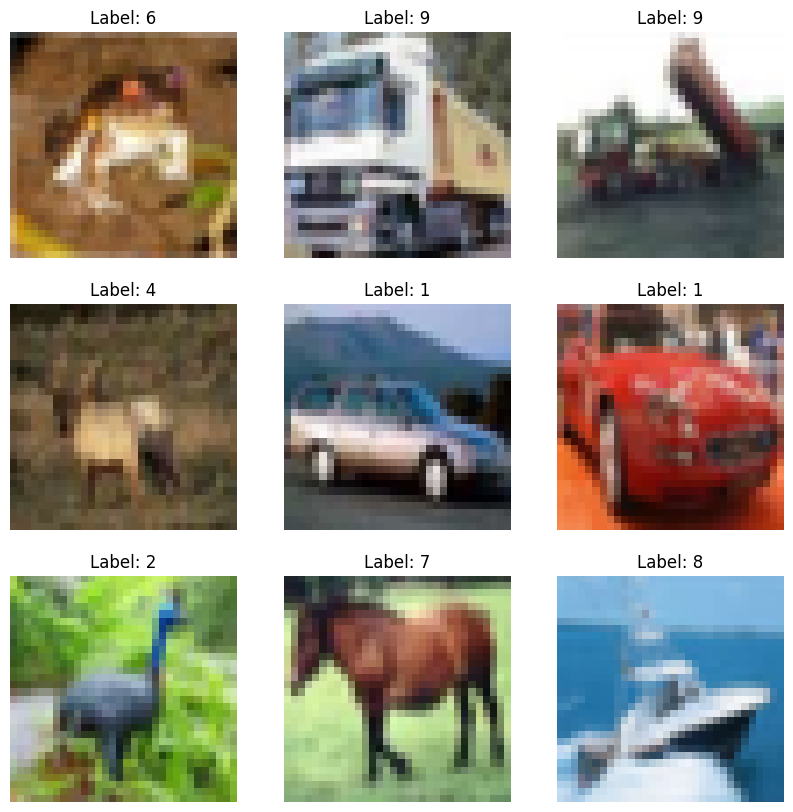

In [ ]:
# Visualize some random images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"Label: {y_train[i][0]}")
    ax.axis('off')
plt.show()

# statistics about cifa-10 dataset

Class Distribution

In [ ]:
class_distribution = {i: np.sum(y_train == i) for i in range(num_classes)}
print("Class Distribution:")
for class_id, count in class_distribution.items():
    print(f"Class {class_id}: {count} samples")

Class Distribution:
Class 0: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 3: 5000 samples
Class 4: 5000 samples
Class 5: 5000 samples
Class 6: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 9: 5000 samples


Mean and Standard Deviation of Pixel Values

In [ ]:
mean_pixel_value = np.mean(x_train, axis=(0, 1, 2))
std_pixel_value = np.std(x_train, axis=(0, 1, 2))
print("Mean Pixel Value (R, G, B):", mean_pixel_value)
print("Std Pixel Value (R, G, B):", std_pixel_value)

Mean Pixel Value (R, G, B): [125.30691805 122.95039414 113.86538318]
Std Pixel Value (R, G, B): [62.99321928 62.08870764 66.70489964]


Image Size:

In [ ]:
image_height, image_width, num_channels = x_train.shape[1:]
print("Image Height:", image_height)
print("Image Width:", image_width)
print("Number of Channels:", num_channels)

Image Height: 32
Image Width: 32
Number of Channels: 3


Data Type Distribution:

In [ ]:
data_types = np.unique(x_train.dtype)
print("Data Types:", data_types)

Data Types: [dtype('uint8')]


Pixel Value Range:

In [ ]:
min_pixel_value = np.min(x_train)
max_pixel_value = np.max(x_train)
print("Minimum Pixel Value:", min_pixel_value)
print("Maximum Pixel Value:", max_pixel_value)

Minimum Pixel Value: 0
Maximum Pixel Value: 255


# Apllying some algorithms of classification

firstly,we will try the CNN model the most efficient algorithm for image classification.

**CNN MODEL**

Importing libraries and loading the cifar-10 dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Normalize pixel values to [0, 1]

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Convert labels to one-hot encoding

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Define CNN model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
acc_cnn=test_accuracy

print("Test Accuracy is:", acc_cnn)


# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true, y_pred))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

I've increased the model capacity by adding more convolutional layers (including more filters) and dense layers. Dropout layers are added after the dense layers for regularization to prevent overfitting. Now the accuracy augmented,lets try something else

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true, y_pred))
print(test_accuracy)
acc_cnn_filters=test_accuracy


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 2048)             

We observe that the accuracy augmented

lets try another CNN Architectures

**Res-Net 50**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Create a data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Load the pre-trained ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Unfreeze some of the layers in the base model
for layer in base_model.layers[-100:]:
    layer.trainable = True

# Add a global average pooling layer and a dense layer for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=30,
                    validation_data=(X_test, Y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {accuracy:.2f}')
acc_cnn_resnet50=test_acc

94765736/94765736 [==============================] - 0s 0us/step


Epoch 1/30
1562/1562 [==============================] - 130s 61ms/step - loss: 1.8797 - accuracy: 0.4044 - val_loss: 1.3469 - val_accuracy: 0.5286
Epoch 2/30
1562/1562 [==============================] - 93s 60ms/step - loss: 1.5888 - accuracy: 0.4907 - val_loss: 4.2319 - val_accuracy: 0.2020
Epoch 3/30
1562/1562 [==============================] - 90s 58ms/step - loss: 1.6113 - accuracy: 0.4804 - val_loss: 2.3849 - val_accuracy: 0.2943
Epoch 4/30
1562/1562 [==============================] - 92s 59ms/step - loss: 1.4475 - accuracy: 0.5312 - val_loss: 1.6043 - val_accuracy: 0.5054
Epoch 5/30
1562/1562 [==============================] - 94s 60ms/step - loss: 1.3884 - accuracy: 0.5534 - val_loss: 2.1957 - val_accuracy: 0.3682
Epoch 6/30
1562/1562 [==============================] - 93s 59ms/step - loss: 1.3776 - accuracy: 0.5574 - val_loss: 2.8635 - val_accuracy: 0.4994
Epoch 7/30
1562/1562 [==============================] - 93s 60ms/step - loss: 1.2113 - accuracy: 0.5977 - val_loss: 1.2876 

**DENSENET**

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.applications.densenet import DenseNet121

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Load the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a classification head
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Print the training and validation accuracy
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])
acc_cnn_densenet=accuracy

Epoch 1/10
1563/1563 [==============================] - 35s 18ms/step - loss: 1.2066 - accuracy: 0.5765 - val_loss: 1.0838 - val_accuracy: 0.6194
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0078 - accuracy: 0.6440 - val_loss: 1.0461 - val_accuracy: 0.6368
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9123 - accuracy: 0.6745 - val_loss: 1.0431 - val_accuracy: 0.6440
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8282 - accuracy: 0.7049 - val_loss: 1.0125 - val_accuracy: 0.6584
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7410 - accuracy: 0.7376 - val_loss: 1.0652 - val_accuracy: 0.6480
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6610 - accuracy: 0.7633 - val_loss: 1.1130 - val_accuracy: 0.6453
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5814 - accuracy: 0.7918 - val_loss: 1.1537 -

Now we covered varioius architectures of CNN model,and the results was good,we observe that the accuracy augmented to 0,86

lets try another algorithms of classification like random forest,knn...

**classification par Random Forest algorithm**

import necessary libraries

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10

Charger le jeu de données CIFAR-10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


Aplatir les images en vecteurs 1D

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

Normaliser les pixels à la plage [0, 1]

In [ ]:
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

Créer et entraîner le modèle Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_flat, y_train)

<ipython-input-7-6ad6d3b393d0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train_flat, y_train)


RandomForestClassifier(random_state=42)

Faire des prédictions sur l'ensemble de test

In [ ]:
y_pred = rf_classifier.predict(X_test_flat)

Calculer la précision du modèle

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle Random Forest:", accuracy)
acc_randomforest=accuracy

Précision du modèle Random Forest: 0.4654


**classification par KNN K- Nearest Neighbors**

Importing libraries and loading the cifar-10 dataset

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load CIFAR-10 dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Flatten images

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

Normalize pixel values

In [ ]:
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

Split the dataset into training and validation sets

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

Applying KNN algorithm

In [ ]:
# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors

# Train the classifier
knn.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred = knn.predict(X_val_split)

# Calculate accuracy on validation set
val_accuracy = accuracy_score(y_val_split, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Predict on the test set
y_test_pred = knn.predict(X_test_flat)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
acc_knn=test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Validation Accuracy: 0.3325
Test Accuracy: 0.3317


# Visualize the results

29084464/29084464 [==============================] - 1s 0us/step
Epoch 1/10
1250/1250 [==============================] - 95s 47ms/step - loss: 1.4008 - accuracy: 0.5293 - val_loss: 2.1673 - val_accuracy: 0.4551
Epoch 2/10
1250/1250 [==============================] - 57s 46ms/step - loss: 1.2657 - accuracy: 0.5657 - val_loss: 1.3829 - val_accuracy: 0.5269
Epoch 3/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.0130 - accuracy: 0.6603 - val_loss: 1.2425 - val_accuracy: 0.5943
Epoch 4/10
1250/1250 [==============================] - 56s 45ms/step - loss: 1.0874 - accuracy: 0.6330 - val_loss: 1.0568 - val_accuracy: 0.6596
Epoch 5/10
1250/1250 [==============================] - 58s 47ms/step - loss: 0.9741 - accuracy: 0.6701 - val_loss: 2.0861 - val_accuracy: 0.4230
Epoch 6/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.0407 - accuracy: 0.6449 - val_loss: 2.4113 - val_accuracy: 0.3900
Epoch 7/10
1250/1250 [==============================] - 59s

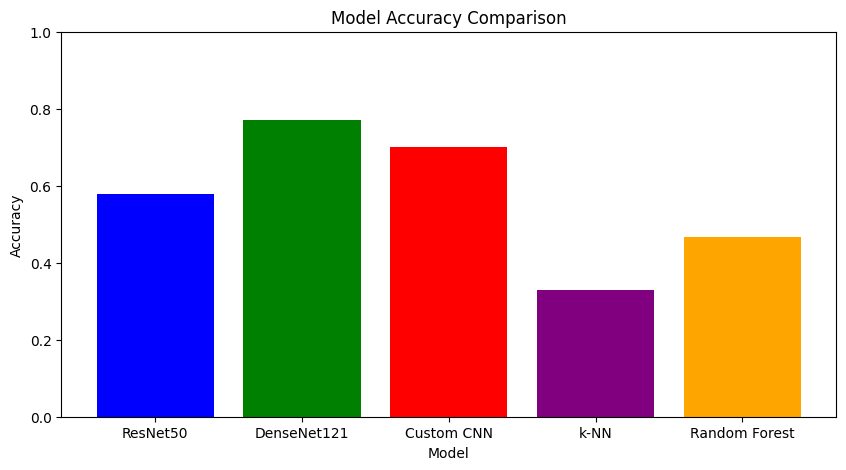

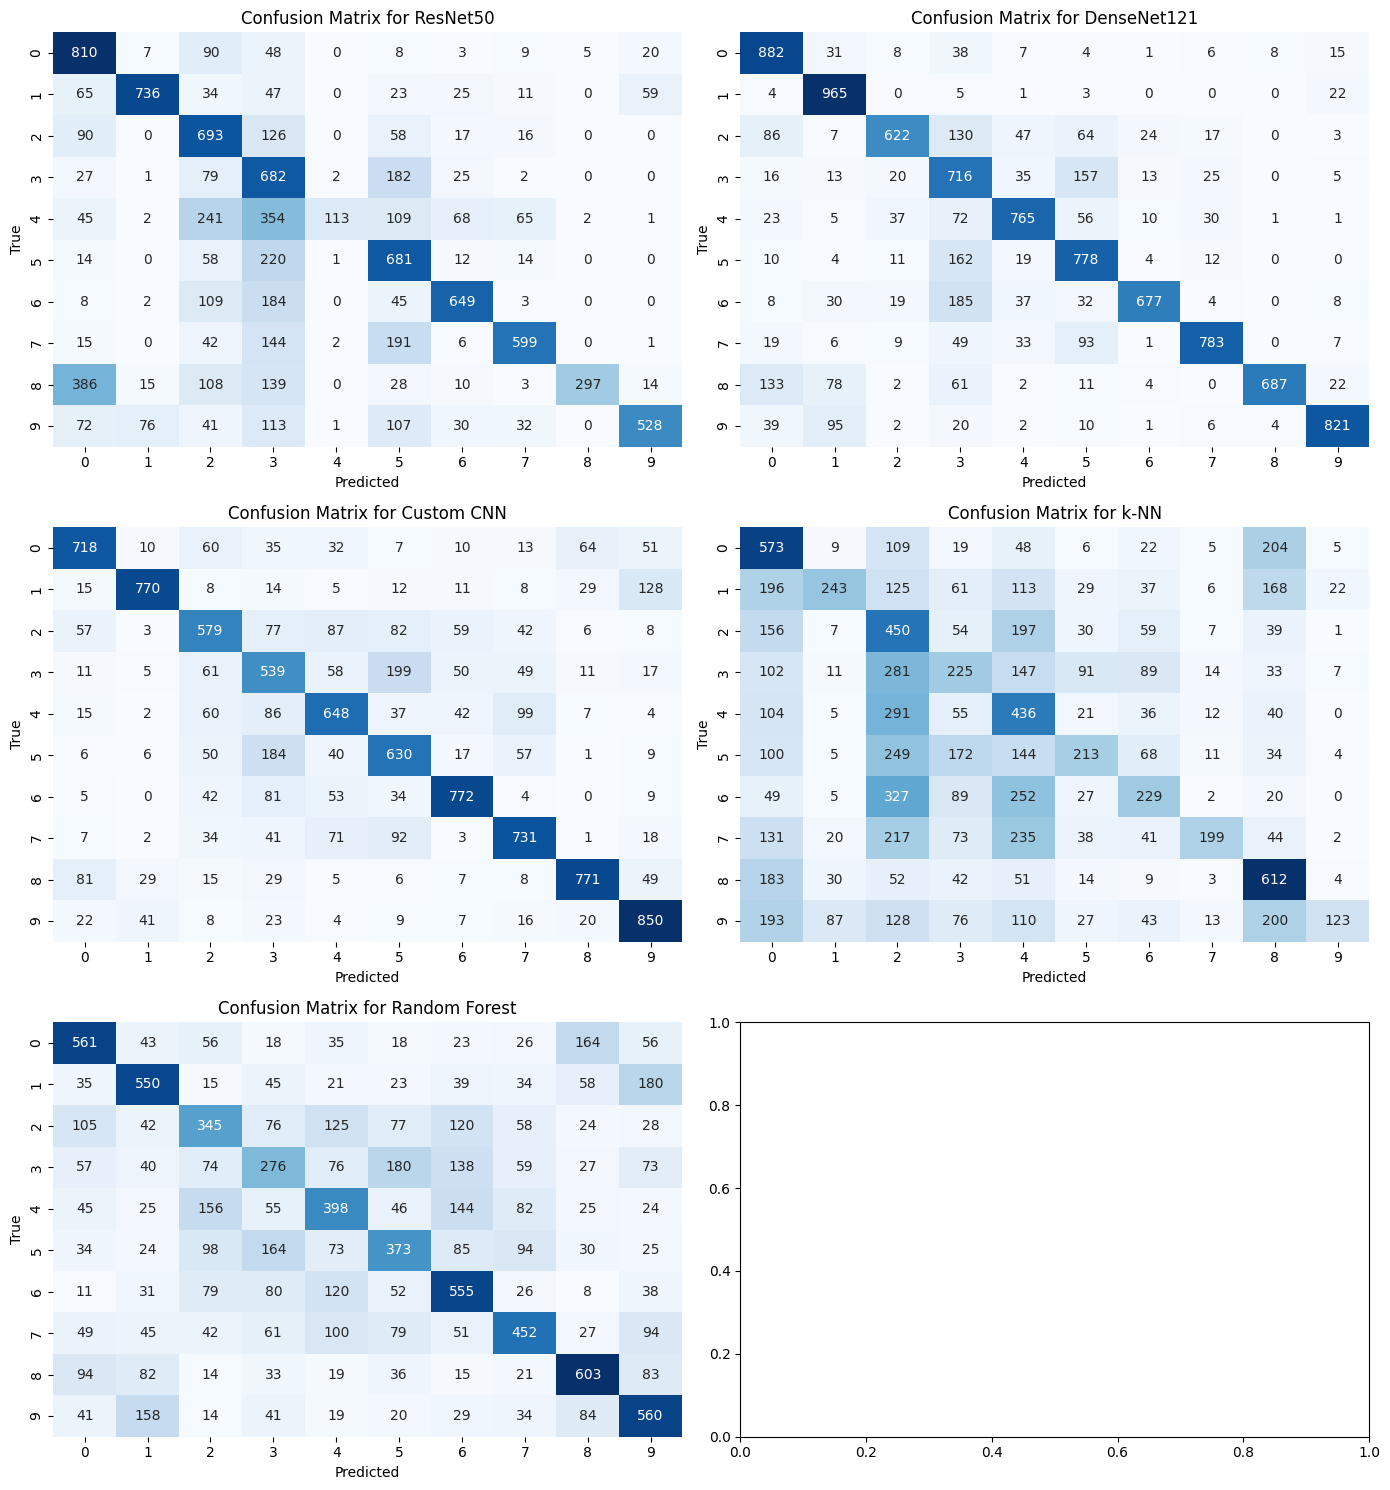

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)

# Define function to create transfer learning CNN models
def create_transfer_learning_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Create and train a simple custom CNN model
def create_custom_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create and compile models
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet50_model = create_transfer_learning_model(resnet50_base, 10)
resnet50_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
densenet_model = create_transfer_learning_model(densenet_base, 10)
densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

custom_cnn_model = create_custom_cnn_model((32, 32, 3), 10)
custom_cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
resnet50_model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)
densenet_model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)
custom_cnn_model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Flatten data for k-NN and Random Forest
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Train k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_flat, y_train.ravel())

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train_flat, y_train.ravel())

# Evaluate models
models = {
    "ResNet50": resnet50_model,
    "DenseNet121": densenet_model,
    "Custom CNN": custom_cnn_model,
    "k-NN": knn_model,
    "Random Forest": rf_model
}

accuracies = {}
confusion_matrices = {}

for name, model in models.items():
    if name in ["k-NN", "Random Forest"]:
        y_pred = model.predict(x_test_flat)
    else:
        y_pred = model.predict(x_test).argmax(axis=1)

    y_true = y_test.ravel()
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    accuracies[name] = accuracy
    confusion_matrices[name] = cm

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrices
fig, axs = plt.subplots(3, 2, figsize=(14, 15))
axs = axs.flatten()
for ax, (name, cm) in zip(axs, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()
